# Keras API Project 

## The Data

The Data is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or not a borrower will pay back their loan? 


----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [363]:
import pandas as pd

In [584]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [585]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [586]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [587]:
feat_info('revol_bal')

Total credit revolving balance


## Loading the data and other imports

In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [589]:
df = pd.read_csv('lending_club_loan_two.csv')

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [591]:
dup = df[df.duplicated()]
dup

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address



------

# Section 1: Exploratory Data Analysis
----

**loan_status countplot**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

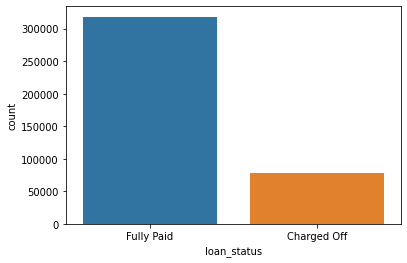

In [62]:
sns.countplot(data = df, x='loan_status')


In [63]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

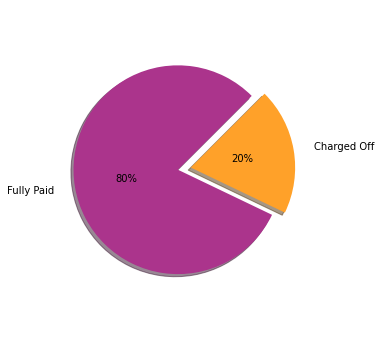

In [64]:
size = [df[df['loan_status']=='Fully Paid']['loan_status'].count(), df[df['loan_status']=='Charged Off']['loan_status'].count()]

plt.figure(figsize=(12,6))
plt.pie(x=size, explode=(0,0.1),labels =('Fully Paid','Charged Off'), shadow= True ,radius=0.8,startangle=45, 
        colors=['#AB348C','#FFA129'],pctdistance=0.5, labeldistance=1.2,autopct = '%0.0f%%')
plt.show()

**histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

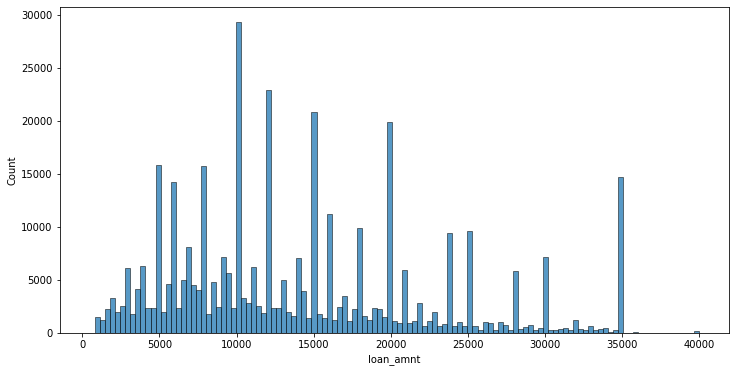

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='loan_amnt')

**Correlation between the continuous feature variables**

In [66]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

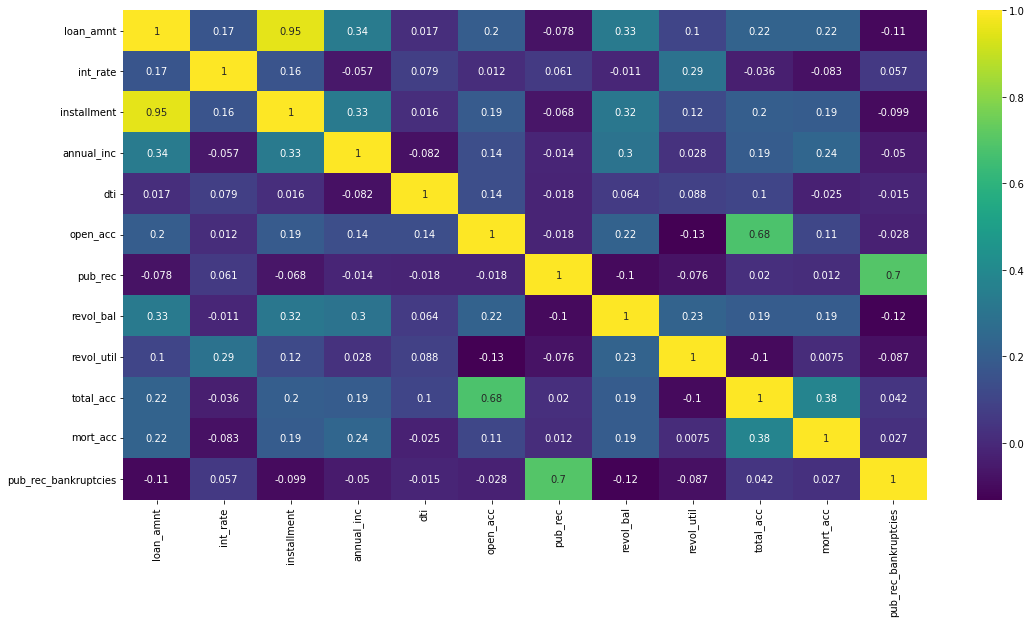

In [67]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

**There is a perfect correlation with the "installment" feature. 
Explore this feature further :**

In [68]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [69]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

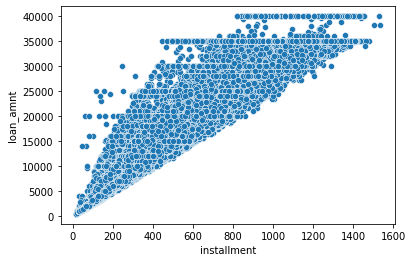

In [70]:
sns.scatterplot(data = df , x='installment', y='loan_amnt' )

**The relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

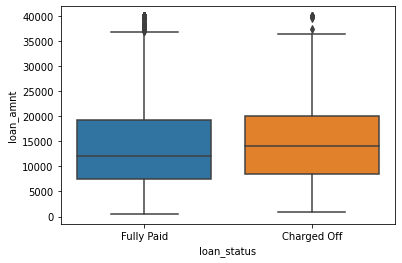

In [71]:
sns.boxplot(data = df , x='loan_status',y='loan_amnt')

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

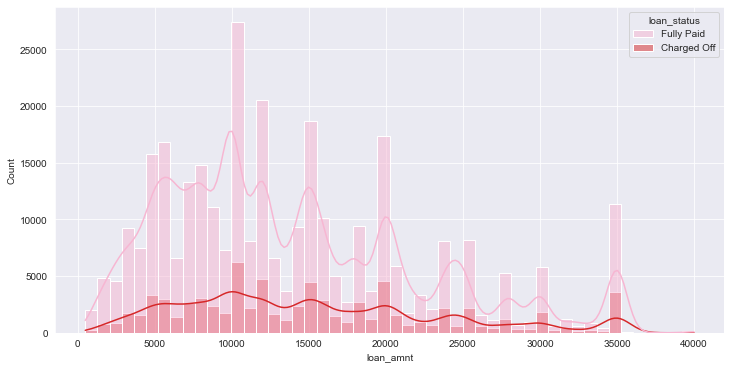

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.histplot(data = df , x='loan_amnt', hue='loan_status', palette='tab20_r',kde=True, bins=50)

**The summary statistics for the loan amount, grouped by the loan_status.**

In [90]:
g = df.groupby(['loan_status'])['loan_amnt'].describe()
g

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Explore the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [98]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [95]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [103]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [104]:
df['sub_grade'].nunique()

35

**countplot per grade in respect to the loan_status**

<AxesSubplot:xlabel='grade', ylabel='count'>

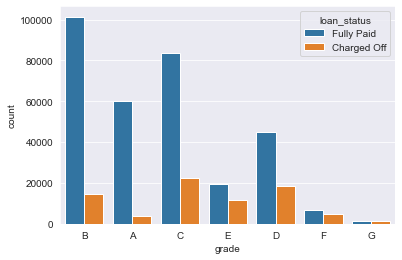

In [100]:
sns.countplot(data=df, x='grade', hue='loan_status')

In [135]:
g = df.groupby(['grade'])['sub_grade'].describe()
g

,count,unique,top,freq
grade,,,,
A,64187,5,A5,18526
B,116018,5,B3,26655
C,105987,5,C1,23662
D,63524,5,D1,15993
E,31488,5,E1,7917
F,11772,5,F1,3536
G,3054,5,G1,1058


**Although the largest number of 'charge-off' is conducted by the grade 'C', by exploring the sub-grades we may notice that the grade 'G' has the most probability of not balancing the loan.**

Text(0.5, 1.0, 'Grade G')

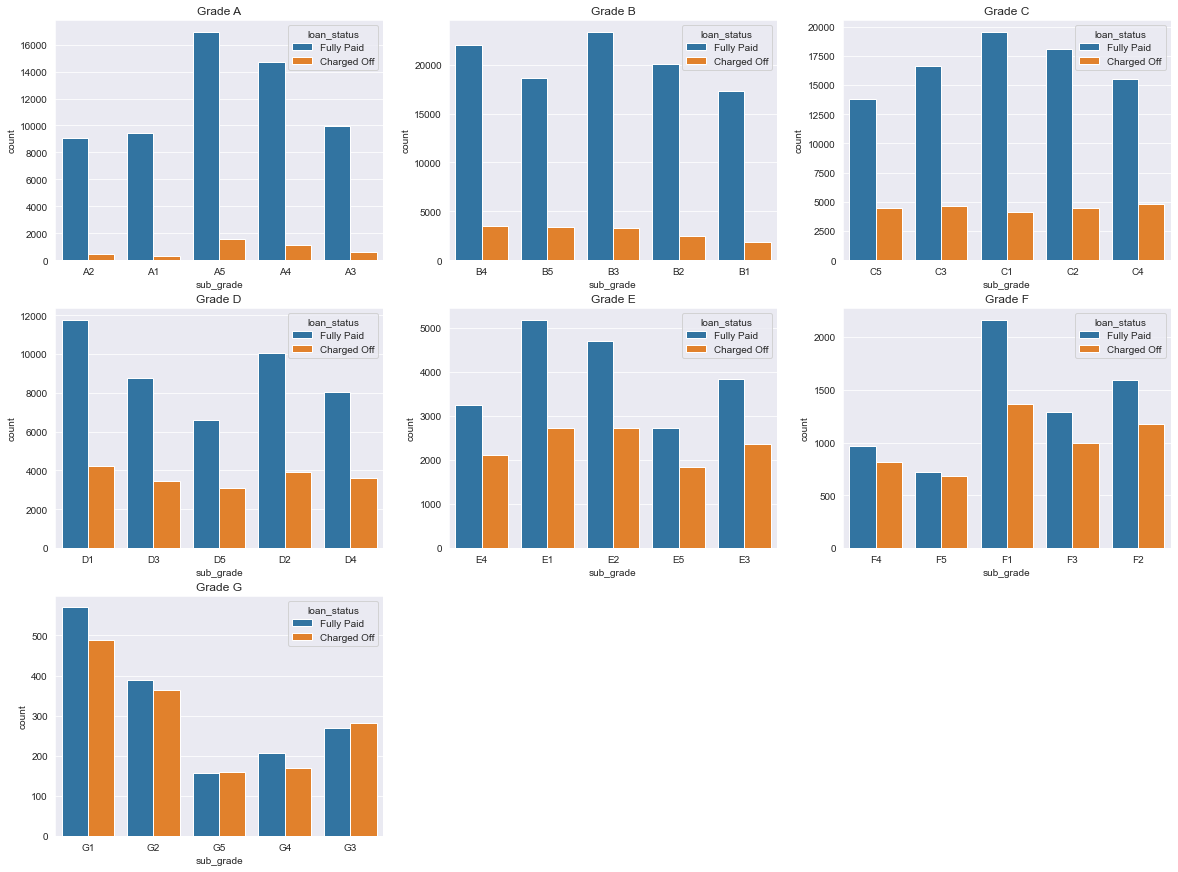

In [139]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot( x=df[(df['sub_grade']=='A1')| (df['sub_grade']=='A2')
                   | (df['sub_grade']=='A3')| (df['sub_grade']=='A4')
                   | (df['sub_grade']=='A5')]['sub_grade'], hue=df['loan_status'])
plt.title('Grade A')

plt.subplot(3,3,2)
sns.countplot( x=df[(df['sub_grade']=='B1')| (df['sub_grade']=='B2')
                   | (df['sub_grade']=='B3')| (df['sub_grade']=='B4')
                   | (df['sub_grade']=='B5')]['sub_grade'], hue=df['loan_status'])
plt.title('Grade B')

plt.subplot(3,3,3)
sns.countplot( x=df[(df['sub_grade']=='C1')| (df['sub_grade']=='C2')
                   | (df['sub_grade']=='C3')| (df['sub_grade']=='C4')
                   | (df['sub_grade']=='C5')]['sub_grade'], hue=df['loan_status'])
plt.title('Grade C')

plt.subplot(3,3,4)
sns.countplot( x=df[(df['sub_grade']=='D1')| (df['sub_grade']=='D2')
                   | (df['sub_grade']=='D3')| (df['sub_grade']=='D4')
                   | (df['sub_grade']=='D5')]['sub_grade'], hue=df['loan_status'])
plt.title('Grade D')

plt.subplot(3,3,5)
sns.countplot( x=df[(df['sub_grade']=='E1')| (df['sub_grade']=='E2')
                   | (df['sub_grade']=='E3')| (df['sub_grade']=='E4')
                   | (df['sub_grade']=='E5')]['sub_grade'], hue=df['loan_status'])
plt.title('Grade E')

plt.subplot(3,3,6)
sns.countplot( x=df[(df['sub_grade']=='F1')| (df['sub_grade']=='F2')
                   | (df['sub_grade']=='F3')| (df['sub_grade']=='F4')
                   | (df['sub_grade']=='F5')]['sub_grade'], hue=df['loan_status'])
plt.title('Grade F')

plt.subplot(3,3,7)
sns.countplot( x=df[(df['sub_grade']=='G1')| (df['sub_grade']=='G2')
                   | (df['sub_grade']=='G3')| (df['sub_grade']=='G4')
                   | (df['sub_grade']=='G5')]['sub_grade'], hue=df['loan_status'])
plt.title('Grade G')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

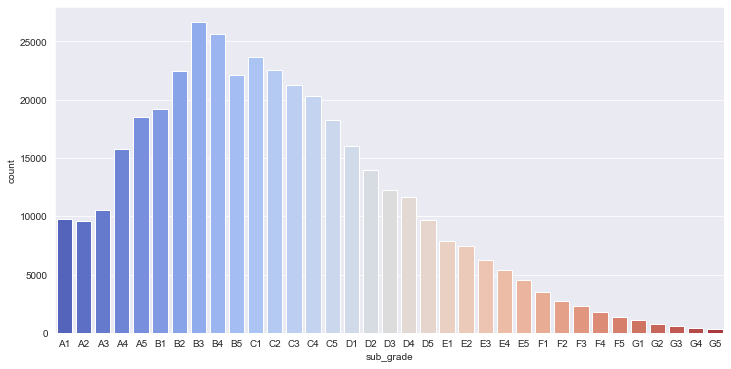

In [140]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()),palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

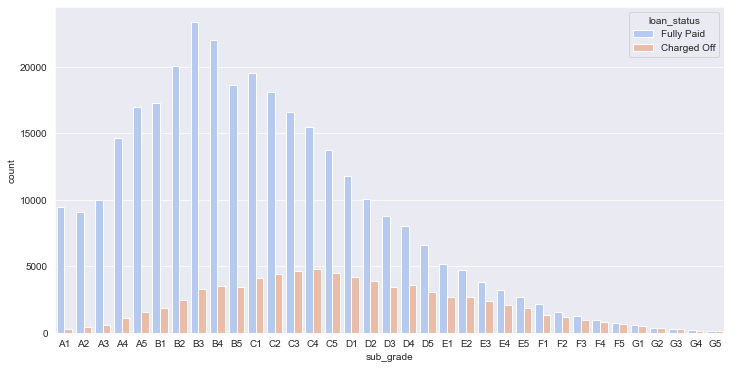

In [141]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()),palette='coolwarm', hue='loan_status')

**It looks like F and G subgrades don't get paid back that often. So, we isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

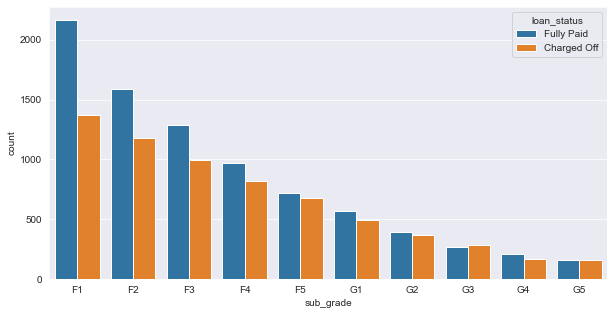

In [147]:
FG = df[(df['grade']=='F')|(df['grade']=='G')]
plt.figure(figsize=(10,5))
sort = sorted(FG['sub_grade'].unique())
sns.countplot(data=FG, x='sub_grade' ,order=sort, hue='loan_status')

**Encode loan_status**

In [592]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [593]:
df[['loan_repaid','loan_status']].head(5)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<AxesSubplot:>

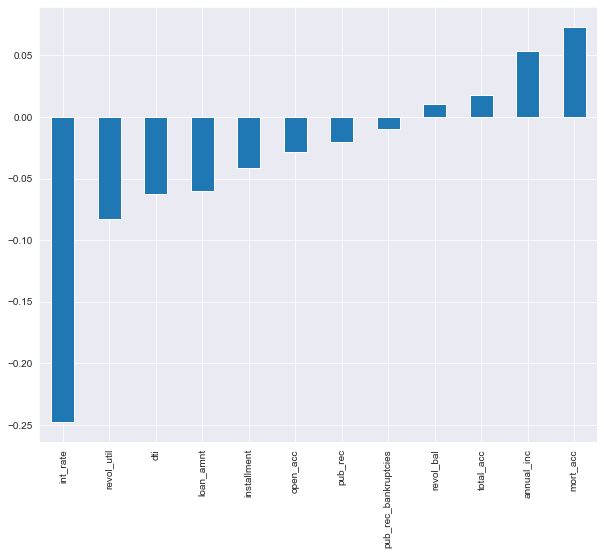

In [594]:
plt.figure(figsize=(10,8))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing




In [595]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


# Missing Data


In [596]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [597]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Convert this Series to be in term of percentage of the total DataFrame**

In [598]:
(df.isnull().sum())/(len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [599]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**unique employment job titles**

In [600]:
df['emp_title'].nunique()

173105

In [601]:
df['emp_title'].value_counts()

Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
Supervisor                    1830
                              ... 
Q.Atechnician                    1
improvement specialist           1
Pioneer                          1
Retirement plan consultant       1
Assmebly Lead Swings             1
Name: emp_title, Length: 173105, dtype: int64

In [602]:
df = df.drop('emp_title',axis=1)

**The count plot of the emp_length feature column.**

In [603]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [604]:
a = [ '< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

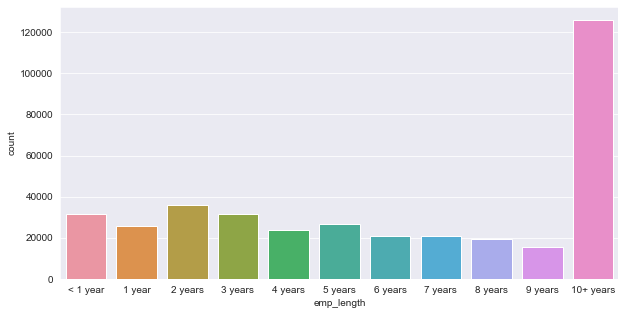

In [605]:
plt.figure(figsize=(10,5))
sns.countplot(data = df , x='emp_length', order=a)

**The countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

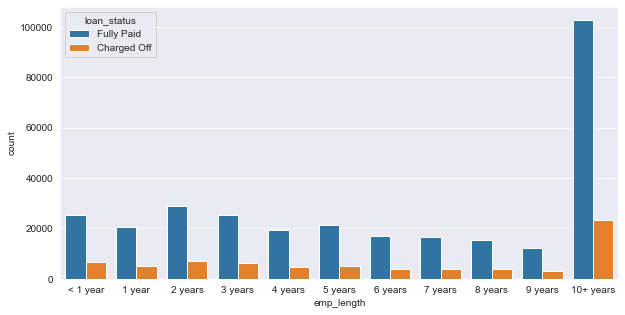

In [606]:
plt.figure(figsize=(10,5))
sns.countplot(data = df , x='emp_length', order=a, hue='loan_status')

In [607]:
g1 = df[df['loan_status']=='Charged Off'].groupby('emp_length')
g1.count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,...,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,...,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,...,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,...,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,...,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,...,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,...,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,...,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [608]:
g1 = g1['loan_status'].count()
g1

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [609]:
g2 = df.groupby("emp_length")

In [610]:
g2.count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,25882,25882,25882,25882,25882,25882,25882,25882,25882,25882,...,25882,25882,25860,25882,25882,25882,22858,25807,25882,25882
10+ years,126041,126041,126041,126041,126041,126041,126041,126041,126041,126041,...,126041,126041,125966,126041,126041,126041,117394,125951,126041,126041
2 years,35827,35827,35827,35827,35827,35827,35827,35827,35827,35827,...,35827,35827,35804,35827,35827,35827,31738,35764,35827,35827
3 years,31665,31665,31665,31665,31665,31665,31665,31665,31665,31665,...,31665,31665,31647,31665,31665,31665,27880,31616,31665,31665
4 years,23952,23952,23952,23952,23952,23952,23952,23952,23952,23952,...,23952,23952,23936,23952,23952,23952,20666,23919,23952,23952
5 years,26495,26495,26495,26495,26495,26495,26495,26495,26495,26495,...,26495,26495,26479,26495,26495,26495,23357,26471,26495,26495
6 years,20841,20841,20841,20841,20841,20841,20841,20841,20841,20841,...,20841,20841,20826,20841,20841,20841,18641,20818,20841,20841
7 years,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,...,20819,20819,20799,20819,20819,20819,19054,20803,20819,20819
8 years,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,...,19168,19168,19150,19168,19168,19168,17751,19149,19168,19168


In [611]:
g2= g2['loan_status'].count()

In [612]:
g3 = g1/g2
g3

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

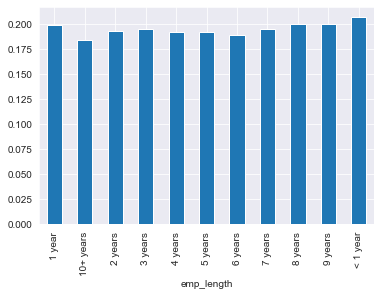

In [613]:
g3.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. so, we can drop this column.**

In [614]:
df = df.drop('emp_length', axis=1)

In [615]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [616]:
feat_info('title')

The loan title provided by the borrower


In [617]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [618]:
df['title'].nunique()

48817

In [619]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [620]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [621]:
df['purpose'].nunique()

14

**The title column is simply a string subcategory of the purpose column. so we can drop the title column.**

In [622]:
df = df.drop('title',axis=1)

---
**what the mort_acc feature represents**

In [623]:
feat_info('mort_acc')

Number of mortgage accounts.


In [624]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [625]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc.  We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry**

In [626]:
new_df = df.groupby('total_acc')['mort_acc']

meanDF = new_df.mean()
meanDF

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**We fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill it in with the mean value corresponding to its total_acc value from the Series we created above.**

In [627]:
def fill_mort(mort_acc ,total_acc ):
    if np.isnan(mort_acc):
        return meanDF[total_acc]
    else:
        return mort_acc

In [628]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['mort_acc'], x['total_acc']), axis=1)

In [629]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**missing values corresponding to pub_rec_bankruptcies**

In [630]:
df.corr()['pub_rec_bankruptcies'].sort_values()

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086751
annual_inc             -0.050162
open_acc               -0.027732
dti                    -0.014558
loan_repaid            -0.009383
mort_acc                0.029276
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [631]:
feat_info('pub_rec')
df['pub_rec'].nunique()

Number of derogatory public records


20

In [632]:
newG = df.groupby('pub_rec').mean()['pub_rec_bankruptcies']
newG

pub_rec
0.0     0.000000
1.0     0.810205
2.0     0.929863
3.0     1.074293
4.0     1.136622
5.0     1.113924
6.0     0.983607
7.0     0.821429
8.0     1.235294
9.0     1.250000
10.0    0.363636
11.0    0.000000
12.0    1.000000
13.0    0.500000
15.0    0.000000
17.0    1.000000
19.0    1.000000
24.0    0.000000
40.0    1.000000
86.0    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [633]:
def fill_pub(pub_rec,pub_rec_bankruptcies):
    if np.isnan(pub_rec_bankruptcies):
        return newG[pub_rec]
    else:
        return pub_rec_bankruptcies

In [634]:
df['pub_rec_bankruptcies'] = df.apply(lambda x: fill_pub(x['pub_rec'],x['pub_rec_bankruptcies']), axis=1 )

In [635]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
loan_repaid               0
dtype: int64

**revol_util does not have a good linear relationship with the other columns.
also it accounts for less than 0.5% of the total data. so, we remove the rows that are missing those values**

In [636]:
df.corr()['revol_util'].sort_values()

open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086387
loan_repaid            -0.082373
pub_rec                -0.075910
mort_acc                0.005821
annual_inc              0.027871
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

In [637]:
df = df.dropna()

In [638]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [639]:
def obj(data):
    return list(data.select_dtypes(include='object'))

In [640]:
objects = obj(df)
objects

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [641]:
len(objects)

12

---
**We now go through all the string features to see what we should do with them.**

---


### term feature

**Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395754 non-null  float64
 1   term                  395754 non-null  object 
 2   int_rate              395754 non-null  float64
 3   installment           395754 non-null  float64
 4   grade                 395754 non-null  object 
 5   sub_grade             395754 non-null  object 
 6   home_ownership        395754 non-null  object 
 7   annual_inc            395754 non-null  float64
 8   verification_status   395754 non-null  object 
 9   issue_d               395754 non-null  object 
 10  loan_status           395754 non-null  object 
 11  purpose               395754 non-null  object 
 12  dti                   395754 non-null  float64
 13  earliest_cr_line      395754 non-null  object 
 14  open_acc              395754 non-null  float64
 15  

In [643]:
df['term'].value_counts()

 36 months    301782
 60 months     93972
Name: term, dtype: int64

In [644]:
# df['Nterm'] = df['term'].apply(lambda term: int(term[:3]))
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})
df['term']

C:\Users\Mary\AppData\Local\Temp/ipykernel_8824/3611535252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].map({' 36 months':36,' 60 months':60})


0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395754, dtype: int64

In [645]:
objects = obj(df)
objects

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [646]:
df = df.drop('grade', axis=1)
df.head(2)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


**Convert the subgrade into dummy variables.**

In [647]:
dum = pd.get_dummies(df['sub_grade'])
dum.head(2)

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [648]:
df = pd.concat([df, dum], axis=1)
df = df.drop('sub_grade', axis=1)
df.head(2)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [649]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

In [650]:
objects = obj(df)
objects

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### home_ownership


In [651]:
df['home_ownership'].value_counts()

MORTGAGE    198219
RENT        159677
OWN          37714
OTHER          110
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [652]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df.head(2)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [653]:
df['home_ownership'].value_counts()

MORTGAGE    198219
RENT        159677
OWN          37714
OTHER          144
Name: home_ownership, dtype: int64

In [654]:
dum2 = pd.get_dummies(df['home_ownership'])
dum2.head(2)

,MORTGAGE,OTHER,OWN,RENT
0,0,0,0,1
1,1,0,0,0


In [655]:
df = df.drop('home_ownership', axis=1)
df = pd.concat([df,dum2], axis=1)
df.head(2)

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,purpose,dti,...,F5,G1,G2,G3,G4,G5,MORTGAGE,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,...,0,0,0,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,...,0,0,0,0,0,0,1,0,0,0


In [656]:
objects = obj(df)
objects

['verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [657]:
df['verification_status'].value_counts()

Verified           139452
Source Verified    131301
Not Verified       125001
Name: verification_status, dtype: int64

In [658]:
df['application_type'].value_counts()

INDIVIDUAL    395043
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [659]:
df['initial_list_status'].value_counts()

f    237881
w    157873
Name: initial_list_status, dtype: int64

In [660]:
df['purpose'].value_counts()

debt_consolidation    234384
credit_card            82999
home_improvement       23997
other                  21146
major_purchase          8769
small_business          5697
car                     4687
medical                 4183
moving                  2850
vacation                2447
house                   2201
wedding                 1810
renewable_energy         329
educational              255
Name: purpose, dtype: int64

In [661]:
dum3 = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']])
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dum3],axis=1)

In [662]:
df.head(2)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0


### address

In [663]:
df['address'].value_counts()

USS Johnson\nFPO AE 48052                      8
USS Smith\nFPO AP 70466                        8
USCGC Smith\nFPO AE 70466                      8
USNS Johnson\nFPO AE 05113                     8
USNS Johnson\nFPO AP 48052                     7
                                              ..
14366 Emily Square\nPort Dylan, WY 22690       1
69717 Shawn Fords\nToddland, NV 86630          1
2953 Underwood Island\nPort Kayla, CT 70466    1
Unit 6957 Box 3906\nDPO AP 22690               1
43049 Timothy Center\nAlyssaport, AK 00813     1
Name: address, Length: 393426, dtype: int64

In [664]:
df['zip code'] = df['address'].apply(lambda x:x[-5:])

In [665]:
df['zip code'].value_counts()

70466    56943
30723    56496
22690    56494
48052    55884
00813    45793
29597    45455
05113    45363
11650    11217
93700    11137
86630    10972
Name: zip code, dtype: int64

**We make this zip_code column into dummy variables**

In [666]:
dum4 = pd.get_dummies(df['zip code'])
df = df.drop(['zip code','address'],axis=1)
df = pd.concat([df,dum4],axis=1)

In [667]:
df.head(2)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0


### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, and we drop this feature.**

In [668]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Aug-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [669]:
df = df.drop('issue_d', axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. we only keep the year feature.**

In [670]:
df['earliest_cr_line'].value_counts()

Oct-2000    3015
Aug-2000    2934
Oct-2001    2895
Aug-2001    2883
Nov-2000    2734
            ... 
Jun-1959       1
Sep-1957       1
Feb-1961       1
May-1962       1
Jul-1955       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [671]:
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [672]:
df['year'] = df['earliest_cr_line'].dt.year

In [673]:
df['year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: year, Length: 395754, dtype: int64

In [674]:
df = df.drop('earliest_cr_line', axis=1)

**loan_status is the feature is going to be predicted. but we keep the loan_repaid column since its already in 0s and 1s**

In [675]:
objects = obj(df)
objects

['loan_status']

In [676]:
df = df.drop('loan_status', axis=1)

## Train Test Split

In [696]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A1', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_f',
       'initial_list_status_w', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purp

In [691]:
from sklearn.model_selection import train_test_split

In [695]:
X = df.drop('loan_repaid', axis=1).values

In [744]:
y = df['loan_repaid'].values
y

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

----
----
Use .sample() to grab a sample of the 490k+ entries to save time on training. it is useful for lower RAM computers 
----
----

In [680]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39575


In [682]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data


In [683]:
from sklearn.preprocessing import MinMaxScaler

In [684]:
scale = MinMaxScaler()

In [685]:
X_train = scale.fit_transform(X_train)

In [686]:
X_test = scale.transform(X_test)

# Creating the Model


In [731]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [732]:
model = Sequential()

In [733]:
model.add(Dense(85, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(44, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [734]:
from tensorflow.keras.callbacks import EarlyStopping

In [718]:
# Early_Stop = EarlyStopping(monitor='val_loss',mode= 'min',verbose=1 ,patience= 10)

**Fit the model to the training data for at least 25 epochs.**

In [735]:
model.fit(X_train,y_train, epochs=25, batch_size=256,validation_data=(X_test, y_test))

Epoch 1/25
1237/1237 [==============================] - 6s 4ms/step - loss: 0.2899 - val_loss: 0.2607
Epoch 2/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2641 - val_loss: 0.2600
Epoch 3/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2625 - val_loss: 0.2591
Epoch 4/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2615 - val_loss: 0.2588
Epoch 5/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2590
Epoch 6/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2603 - val_loss: 0.2587
Epoch 7/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2597 - val_loss: 0.2587
Epoch 8/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.2596 - val_loss: 0.2589
Epoch 9/25
1237/1237 [==============================] - 6s 4ms/step - loss: 0.2593 - val_loss: 0.2589
Epoch 10/25
1237/1237 [==============================] - 5s 4ms/step - loss: 0.259

**Saving model.**

In [726]:
from tensorflow.keras.models import load_model

In [727]:
model.save('project_model_V1.h5')

# Section 3: Evaluating Model Performance.


In [736]:
loss = pd.DataFrame(model.history.history)

In [737]:
loss.head()

,loss,val_loss
0,0.289943,0.260681
1,0.264112,0.259994
2,0.262472,0.259063
3,0.261532,0.258787
4,0.260747,0.258957


<AxesSubplot:>

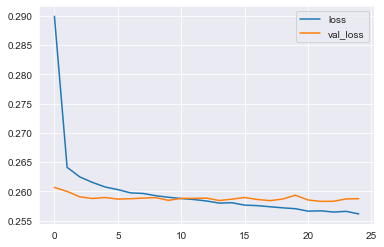

In [738]:
loss[['loss','val_loss']].plot()

**Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [740]:
from sklearn.metrics import classification_report,confusion_matrix

In [746]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [747]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15490
           1       0.88      1.00      0.94     63661

    accuracy                           0.89     79151
   macro avg       0.93      0.72      0.77     79151
weighted avg       0.90      0.89      0.87     79151



In [748]:
confusion_matrix(y_test,predictions)

array([[ 6841,  8649],
       [  165, 63496]], dtype=int64)

**Given the customer below, we check if we would  offer this person a loan?**

In [753]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt       9550.00
term              36.00
int_rate          15.99
installment      335.71
annual_inc     24000.00
                 ...   
48052              0.00
70466              0.00
86630              0.00
93700              0.00
year            2002.00
Name: 54692, Length: 85, dtype: float64

In [756]:
pred = (model.predict(new_customer.values.reshape(1,85)) > 0.5).astype("int32")
pred

array([[1]])

In [757]:
df.iloc[random_ind]['loan_repaid']

1.0